# [Probability and statistics (4th edition)](https://www.amazon.com/Probability-Statistics-4th-Morris-DeGroot/dp/0321500466)

In [1]:
import numpy
import random
import pandas
import matplotlib.pyplot as plt
%matplotlib


Using matplotlib backend: MacOSX


## Example 7.4.7 page 412 of Schervish and Degroot

This example shows how the mean of the posterior distrubution converges to the population mean as the sample size increases!

In [5]:
def mu_distribution(mu_null = 30.0, v_null = 4.0, sample_mean = 39.85,n = 10000):
    mu_one_list = []
    for i in range(0, n):
        numerator   = (4.0 * mu_null) + i * v_null**2 * sample_mean

        denominator = 4.0 + i * v_null**2

        mu_one = numerator/denominator
        mu_one_list.append(mu_one)
    
    return numpy.array(mu_one_list).astype("float32")

In [6]:
size = 5000
x    = range(0, size)
y    = mu_distribution(n = size)

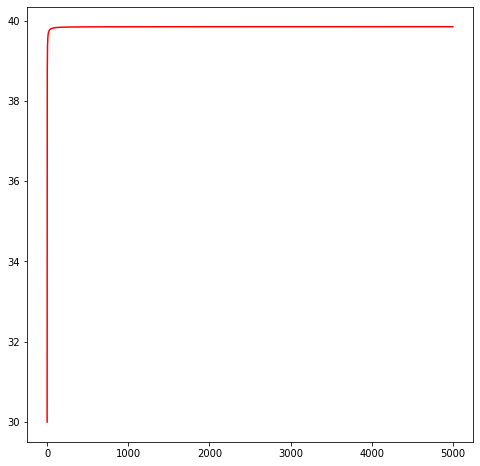

In [7]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
ax.plot(x, y, "r")

# Example 12.3.3 from Schervish and Degroot (2006)

I am plotting these function to see what ___unbound___ means and whether actually eq. 12.3.2 is true that f_y is less than f_y2 in (0, 1) interval! (Note that here I am writing f_y and f_y2 to distinguish between the two functions)!

In [14]:
pi      = numpy.pi
epsilon = 0.01
y       = numpy.linspace(0 + epsilon, 1 - epsilon, 100)
f_y     = (1/pi)*(y**(-1/2))*((1 - y)**(-1/2))
f_y2    = (1/pi)*(y**(-1/2) + (1 - y)**(-1/2))

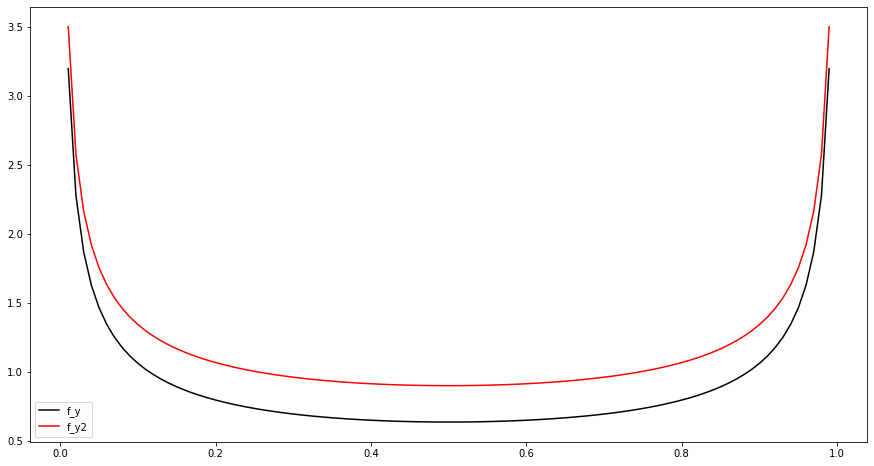

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.plot(y, f_y, "k")
ax.plot(y, f_y2, "r")

ax.legend(["f_y", "f_y2"])

# Figure 5.7 page 320 of Schervish and Degroot 

In [16]:
from scipy.stats import gamma

In [404]:
x        = numpy.linspace(0.01, 5, 100)

shape1 = 0.1
beta1  = 0.1
scale1 = 1/beta1
gamma_1  = gamma.pdf(x, a = shape1, scale = scale1)

shape2 = 1.0
beta2  = 1.0
scale2 = 1/beta2
gamma_2  = gamma.pdf(x, a = shape2, scale = scale2)

shape3 = 2.0
beta3  = 2.0
scale3 = 1/beta3
gamma_3  = gamma.pdf(x, a = shape3, scale = scale3)

shape4 = 3.0
beta4  = 3.0
scale4 = 1/beta4
gamma_4  = gamma.pdf(x, a = shape4, scale = scale4)

(0, 1.2)

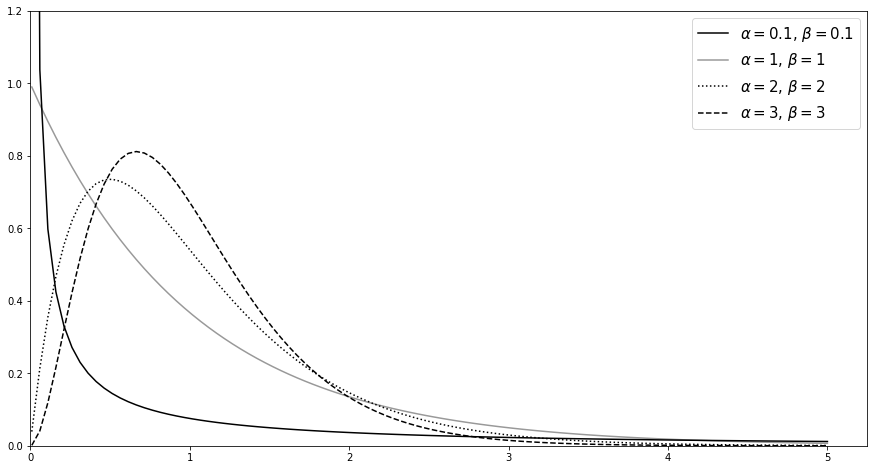

In [405]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))

ax.plot(x, gamma_1, "k-")
ax.plot(x, gamma_2, "k", alpha = 0.4)
ax.plot(x, gamma_3, "k:")
ax.plot(x, gamma_4, "k--")

ax.legend([r"$\alpha = 0.1$, $\beta = 0.1$", r"$\alpha = 1$, $\beta = 1$", \
           r"$\alpha = 2$, $\beta = 2$", r"$\alpha = 3$, $\beta = 3$"], fontsize = 15)

ax.set_xlim(0.0)
ax.set_ylim(0, 1.2)

# Example 8.1.4 (figure 8.1) pages 466 and 467 of Schervish and Degroot 

As it can be seen from the plot below most of the problem has been solved except the strange behavior of the two functions within [0 to 0.1] interval! I tired to resolve the issue but I am not sure what is causing it! The fact that I have gotten most of it right makes me think that the issue is not the result of poor coding but, possibly, I am missing some mathematical point somewhere! For instance, figure 8.1 in the book shows that both functions have value of one at $\theta = 0.0$ but while both functions here have ___CDF___ 0.0 at $\theta = 0.0$! How is that possible to get one? Note that at $\theta = 0.0$ the values of $\frac{4.0}{\theta - 0.1} -2.0$ is $-42.0$ and the value of $\frac{4.0}{\theta + 0.1} -2.0$ is $38.0$ and the CDF for these two is $0.0$ and $0.0$, respectively! Alos, loot at my calculation at the edges of these pages (specially page 467)! Finally, is the equation 8.1.1 correct? (Look at my calculation on the left side of the page 466)!

In [410]:
def gamma_cdf(gamma_theta, gamma_shape = 3.0):
    gamma_scale        = 1/gamma_theta # Note that here gamma theta is beta!
    input_data_plus_t  = 4.0/(gamma_theta + 0.1) - 2.
    input_data_minus_t = 4.0/(gamma_theta - 0.1) - 2.
    
    gamma_cdf_plus_t   = gamma.cdf(input_data_plus_t, a = gamma_shape, scale = gamma_scale)
    gamma_cdf_minus_t  = gamma.cdf(input_data_minus_t, a = gamma_shape, scale = gamma_scale)
    
    output = gamma_cdf_minus_t - gamma_cdf_plus_t 
    
#     print("gamma theta ===> ", gamma_theta)
#     print("input_data_plus_t ===> ", input_data_plus_t)
#     print("input_data_minus_t ===> ", input_data_minus_t)
#     print("gamma_cdf_plus_t ===> ", gamma_cdf_plus_t)
#     print("gamma_cdf_minus_t ===> ",gamma_cdf_minus_t)
#     print("output ===> ",output)

    return output


def mle_cdf(gamma_theta, gamma_shape = 3.0, observation_count = 3.0):
    gamma_scale            = 1/gamma_theta # Note that here gamma theta is beta!
    mle_input_data_plus_t  = observation_count/(gamma_theta + 0.1)
    mle_input_data_minus_t = observation_count/(gamma_theta - 0.1)
    
    mle_gamma_cdf_plus_t   = gamma.cdf(mle_input_data_plus_t,  a = gamma_shape, scale = gamma_scale)
    mle_gamma_cdf_minus_t  = gamma.cdf(mle_input_data_minus_t, a = gamma_shape, scale = gamma_scale)

    mle_output = mle_gamma_cdf_minus_t - mle_gamma_cdf_plus_t
    return mle_output

In [411]:
theta_range = numpy.linspace(0.01, 2., 100)
theta_hat_minus_theta     = gamma_cdf(theta_range)

mle_theta_hat_minus_theta = mle_cdf(theta_range, observation_count = 3.0)


(0.0, 2.0995)

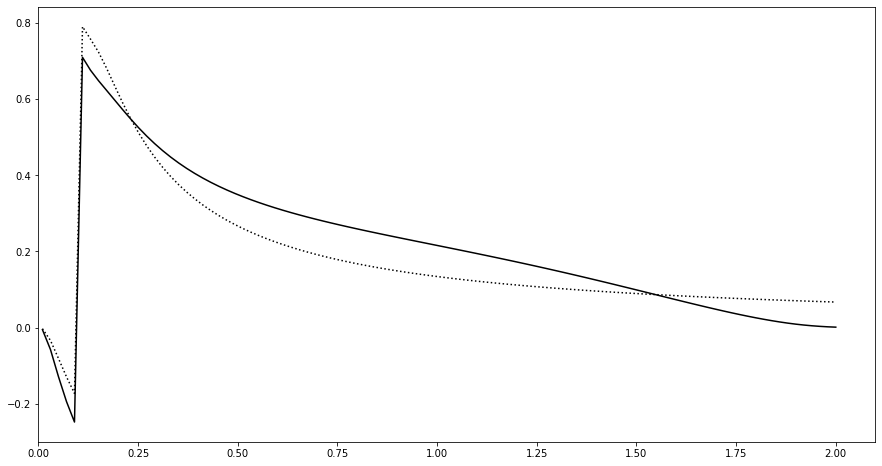

In [413]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))

ax.plot(theta_range, theta_hat_minus_theta, 'k-', label='gamma pdf')

ax.plot(theta_range, mle_theta_hat_minus_theta, 'k:', label='gamma pdf')

ax.set_xlim(0.0)
# ax.set_ylim(0.0)
